In [10]:
#pandas/seaborn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_calificaciones = pd.read_csv("calificaciones.csv")
df_carrera = pd.read_csv("carrera.csv")
df_escuelas = pd.read_csv("escuelas.csv")
df_estudiantes = pd.read_csv("estudiantes.csv")
df_fusion = pd.merge(df_estudiantes, df_calificaciones, on='clave_alumno')
df_fusion = pd.merge(df_fusion, df_carrera, on='clave_carrera')
df_fusion = pd.merge(df_fusion, df_escuelas, left_on='prepa',right_on='clave')
df_fusion.head()

 

,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,clave_materia,calificacion,tipo_calificacion,nombre,corto,clave,escuela
0,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003,ACH9322,95.0,1,INGENIERIA ELECTRONICA,Electronica,125,UAS (8 DE JULIO EL TAMARINDO)
1,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003,ACB9309,0.0,3,INGENIERIA ELECTRONICA,Electronica,125,UAS (8 DE JULIO EL TAMARINDO)
2,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003,ACC9326,87.0,1,INGENIERIA ELECTRONICA,Electronica,125,UAS (8 DE JULIO EL TAMARINDO)
3,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003,ACM9301,0.0,3,INGENIERIA ELECTRONICA,Electronica,125,UAS (8 DE JULIO EL TAMARINDO)
4,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003,ACB9339,83.0,1,INGENIERIA ELECTRONICA,Electronica,125,UAS (8 DE JULIO EL TAMARINDO)


# promedio por semestre por carrera 

        Carrera    Sexo   Promedio
0    Bioquimica  Hombre  87.182523
1    Bioquimica   Mujer  89.892341
2     Electrica  Hombre  83.953852
3     Electrica   Mujer  87.233400
4   Electronica  Hombre  85.686848
5   Electronica   Mujer  88.465534
6    Industrial  Hombre  87.718999
7    Industrial   Mujer  91.493934
8   Informatica  Hombre  86.247141
9   Informatica   Mujer  88.916365
10     Mecanica  Hombre  85.058768
11     Mecanica   Mujer  88.732782
12  Mecatronica  Hombre  87.472334
13  Mecatronica   Mujer  90.692740
14     Sistemas  Hombre  85.275790
15     Sistemas   Mujer  88.359288
16          TIC  Hombre  77.994152
17          TIC   Mujer  81.883117


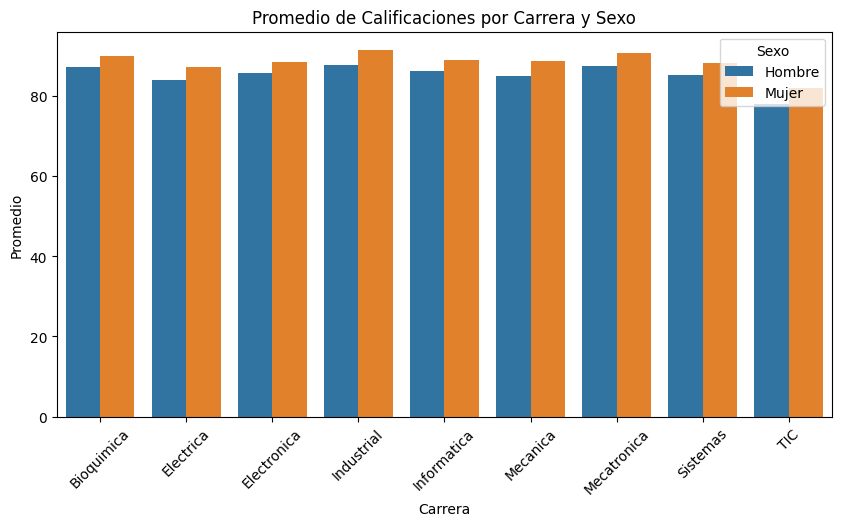

In [11]:
#Union de calificaciones con estudiantes
df=df_calificaciones.merge(df_estudiantes, on='clave_alumno')
#Carreras
df=df.merge(df_carrera, on='clave_carrera')
#Calificaciones validas
dfCalfValidas=df[df['tipo_calificacion']==1]
#Carrera, sexo y promedio
promedio=dfCalfValidas.groupby(['corto','sexo'])['calificacion'].mean().reset_index()
#Tabla promedios
promedio.columns=['Carrera', 'Sexo', 'Promedio']
#Mapear sexo o texto
promedio['Sexo'] = promedio['Sexo'].map({1: 'Hombre', 2: 'Mujer'})
#Imprimir tabla promedios
print(promedio)
# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=promedio, x='Carrera', y='Promedio', hue='Sexo')
plt.title('Promedio de Calificaciones por Carrera y Sexo')
plt.xticks(rotation=45)
plt.show()

# Cantidad de alumnos en cada carrera


In [ ]:
# Calcular la cantidad de alumnos en cada carrera
cantidad_alumnos_por_carrera = df_fusion.groupby('nombre')['clave_alumno'].nunique()
print(cantidad_alumnos_por_carrera)

nombre
INGENIERIA BIOQUIMICA                                            585
INGENIERIA ELECTRICA                                             694
INGENIERIA ELECTRONICA                                          1285
INGENIERIA EN SISTEMAS COMPUTACIONALES                          1293
INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y COMUNICACIONES      66
INGENIERIA INDUSTRIAL                                           3042
INGENIERIA MECANICA                                             1111
INGENIERIA MECATRONICA                                           518
LICENCIATURA EN INFORMATICA                                     1085
Name: clave_alumno, dtype: int64


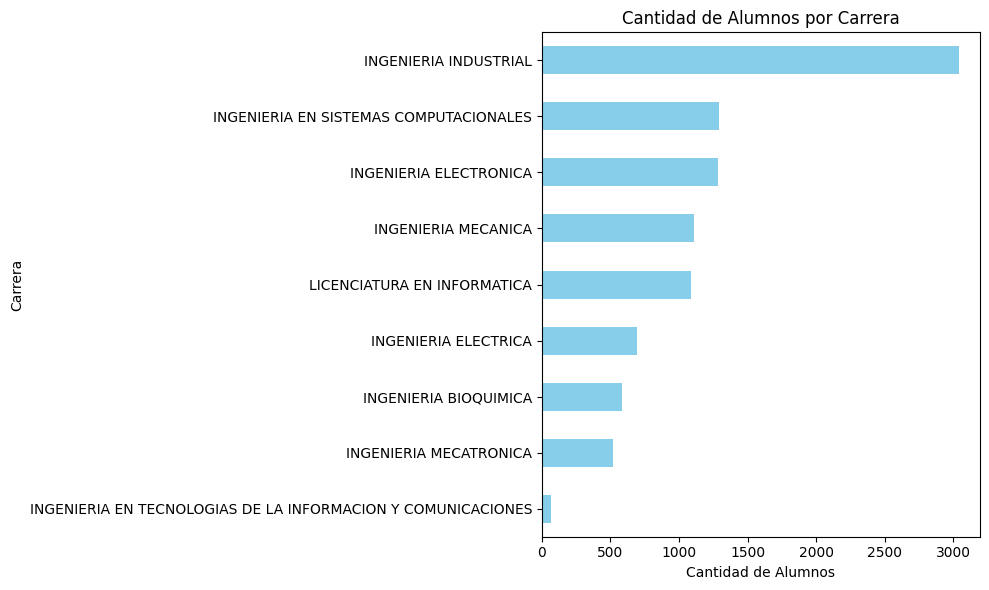

In [ ]:
import matplotlib.pyplot as plt

# Crear una gráfica de barras
cantidad_alumnos_por_carrera.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cantidad de Alumnos')
plt.ylabel('Carrera')
plt.title('Cantidad de Alumnos por Carrera')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# cantidad de alumnos graduados

nombre
INGENIERIA BIOQUIMICA                      192
INGENIERIA ELECTRICA                       203
INGENIERIA ELECTRONICA                     491
INGENIERIA EN SISTEMAS COMPUTACIONALES     207
INGENIERIA INDUSTRIAL                     1164
INGENIERIA MECANICA                        300
INGENIERIA MECATRONICA                       1
LICENCIATURA EN INFORMATICA                412
Name: clave_alumno, dtype: int64


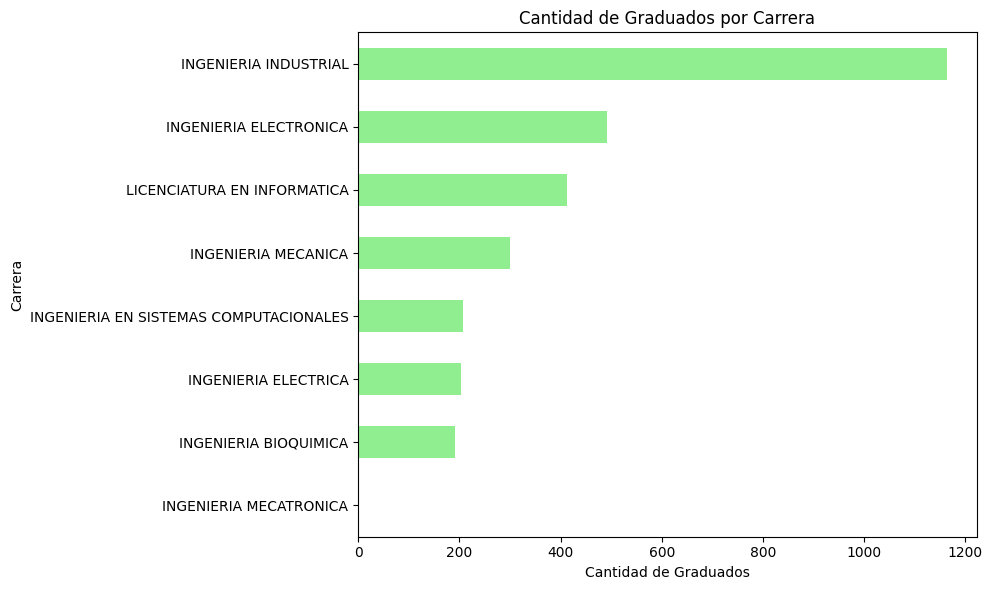

In [ ]:
# Calcular la cantidad de alumnos graduados por carrera basándose en la columna 'causa_salida'
cantidad_graduados_por_carrera = df_fusion[df_fusion['causa_salida'] == 5].groupby('nombre')['clave_alumno'].nunique()
print(cantidad_graduados_por_carrera)
# Crear una gráfica de barras para graduados
cantidad_graduados_por_carrera.sort_values().plot(kind='barh', figsize=(10, 6), color='lightgreen')
# Configurar etiquetas y título
plt.xlabel('Cantidad de Graduados')
plt.ylabel('Carrera')
plt.title('Cantidad de Graduados por Carrera')
# Mostrar la gráfica
plt.tight_layout()
plt.show()


nombre
INGENIERIA BIOQUIMICA                                           32.820513
INGENIERIA ELECTRICA                                            29.250720
INGENIERIA ELECTRONICA                                          38.210117
INGENIERIA EN SISTEMAS COMPUTACIONALES                          16.009281
INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y COMUNICACIONES     0.000000
INGENIERIA INDUSTRIAL                                           38.264300
INGENIERIA MECANICA                                             27.002700
INGENIERIA MECATRONICA                                           0.193050
LICENCIATURA EN INFORMATICA                                     37.972350
Name: clave_alumno, dtype: float64


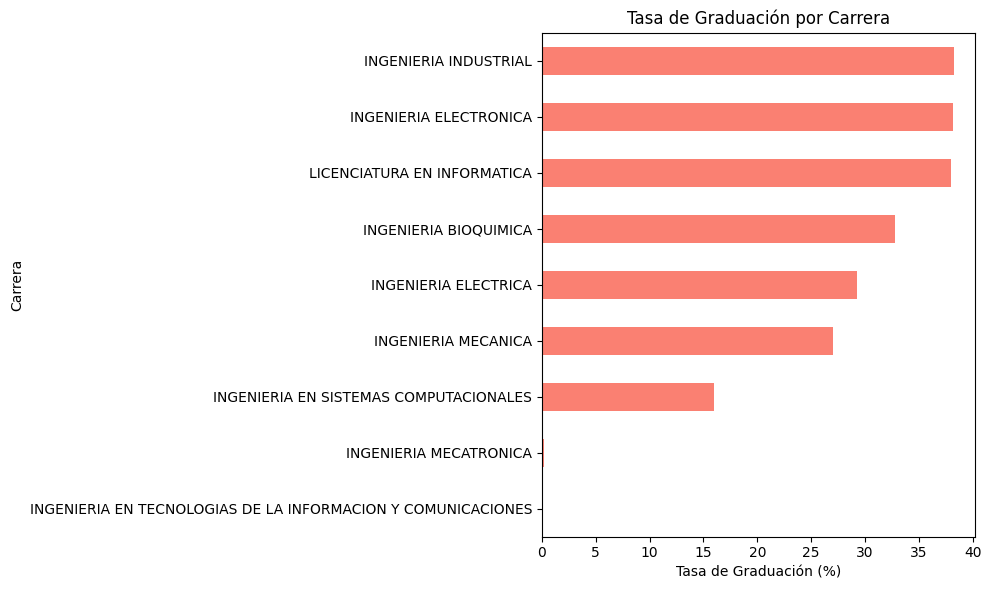

In [ ]:
# Calcular la tasa de graduación por carrera
tasa_graduacion_por_carrera = (cantidad_graduados_por_carrera / cantidad_alumnos_por_carrera).fillna(0) * 100
print(tasa_graduacion_por_carrera)
# Crear una gráfica de barras para la tasa de graduación
tasa_graduacion_por_carrera.sort_values().plot(kind='barh', figsize=(10, 6), color='salmon')
# Configurar etiquetas y título
plt.xlabel('Tasa de Graduación (%)')
plt.ylabel('Carrera')
plt.title('Tasa de Graduación por Carrera')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

Cantidad de graduados por sexo

sexo
1    2028
2     942
Name: clave_alumno, dtype: int64


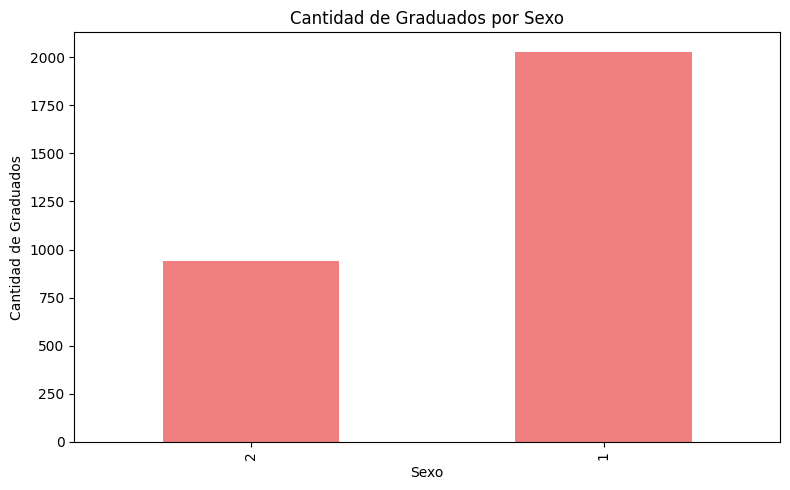

In [ ]:
# Calcular la cantidad de graduados por sexo basándose en la columna 'causa_salida'
cantidad_graduados_por_sexo = df_fusion[df_fusion['causa_salida'] == 5].groupby('sexo')['clave_alumno'].nunique()
print(cantidad_graduados_por_sexo)
# Crear una gráfica de barras para graduados por sexo
cantidad_graduados_por_sexo.sort_values().plot(kind='bar', figsize=(8, 5), color='lightcoral')
# Configurar etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Graduados')
plt.title('Cantidad de Graduados por Sexo')
# Mostrar la gráfica
plt.tight_layout()
plt.show()


sexo
1    27.531903
2    40.726329
Name: clave_alumno, dtype: float64


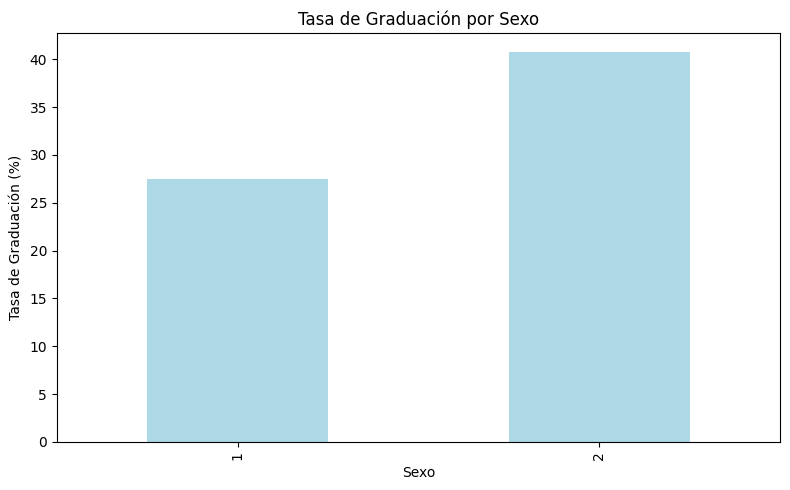

In [ ]:
# Tasa de graduación por sexo
tasa_graduacion_por_sexo = (df_fusion[df_fusion['causa_salida'] == 5].groupby('sexo')['clave_alumno'].nunique() / 
                             df_fusion.groupby('sexo')['clave_alumno'].nunique()).fillna(0) * 100
print(tasa_graduacion_por_sexo)
# Crear una gráfica de barras para la tasa de graduación por sexo
tasa_graduacion_por_sexo.sort_values().plot(kind='bar', figsize=(8, 5), color='lightblue')
# Configurar etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Tasa de Graduación (%)')
plt.title('Tasa de Graduación por Sexo')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# Crear un nuevo DataFrame basado en df_fusion con columnas adicionales para año y periodo
def interpretar_periodo(valor):
    if pd.isna(valor):
        return None, None
    valor_str = str(int(valor))  # Convertir a string eliminando decimales
    anio = 2000 + int(valor_str[1:3])  # Extraer el año
    periodo = int(valor_str[3])  # Extraer el periodo
    return anio, periodo

# Copiar el DataFrame original
df_fusion_extendido = df_fusion.copy()

# Agregar las columnas interpretadas como nuevas columnas al final del DataFrame
df_fusion_extendido['anio_ingreso'] = df_fusion['ingreso'].apply(lambda x: interpretar_periodo(x)[0])
df_fusion_extendido['periodo_ingreso'] = df_fusion['ingreso'].apply(lambda x: interpretar_periodo(x)[1])
df_fusion_extendido['anio_termino'] = df_fusion['termino'].apply(lambda x: interpretar_periodo(x)[0])
df_fusion_extendido['periodo_termino'] = df_fusion['termino'].apply(lambda x: interpretar_periodo(x)[1])

# Mostrar las primeras filas del DataFrame extendido para verificar
print(df_fusion_extendido.head())

   clave_alumno  clave_carrera  sexo  prepa          colonia  municipio  \
0           248              4     1    125  FRAC.RINCON HYA    25006.0   
1           248              4     1    125  FRAC.RINCON HYA    25006.0   
2           248              4     1    125  FRAC.RINCON HYA    25006.0   
3           248              4     1    125  FRAC.RINCON HYA    25006.0   
4           248              4     1    125  FRAC.RINCON HYA    25006.0   

           ciudad  ingreso  termino  causa_salida  ...  calificacion  \
0  CULIACAN, SIN.   2003.0   2061.0             5  ...          95.0   
1  CULIACAN, SIN.   2003.0   2061.0             5  ...           0.0   
2  CULIACAN, SIN.   2003.0   2061.0             5  ...          87.0   
3  CULIACAN, SIN.   2003.0   2061.0             5  ...           0.0   
4  CULIACAN, SIN.   2003.0   2061.0             5  ...          83.0   

  tipo_calificacion                  nombre        corto clave  \
0                 1  INGENIERIA ELECTRONICA  Elect

# anio con mayor poblacion estudiantil

Año con mayor población estudiantil: 2005.0 con 49372 estudiantes


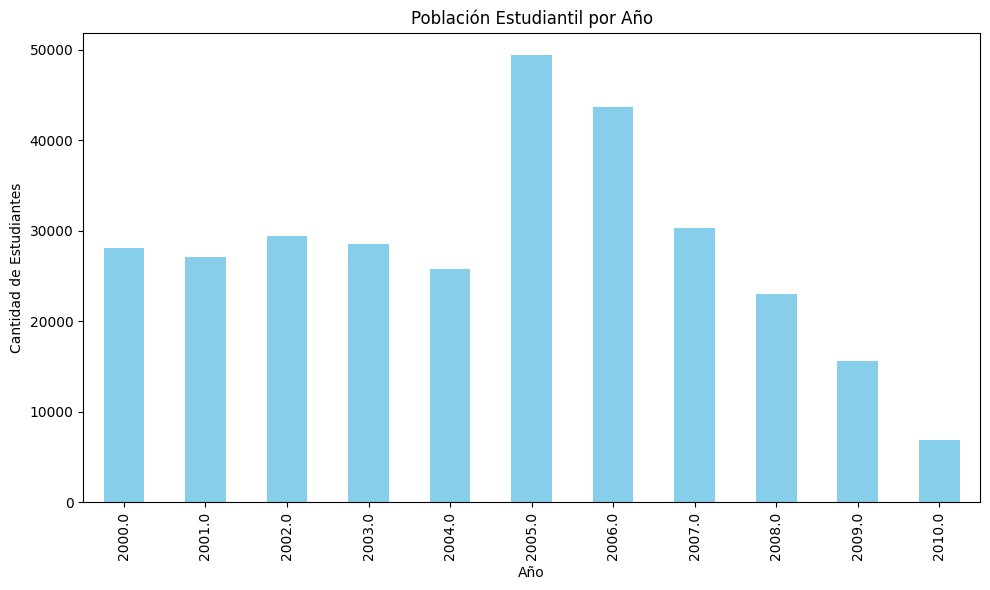

In [ ]:
# Calcular la población estudiantil por año
poblacion_por_anio = df_fusion_extendido['anio_ingreso'].value_counts()

# Encontrar el año con mayor población estudiantil
anio_mayor_poblacion = poblacion_por_anio.idxmax()
cantidad_mayor_poblacion = poblacion_por_anio.max()

print(f"Año con mayor población estudiantil: {anio_mayor_poblacion} con {cantidad_mayor_poblacion} estudiantes")

# Crear una gráfica de barras para la población estudiantil por año
poblacion_por_anio.sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Población Estudiantil por Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# anio con mayor ingreso

Año con mayor ingreso: 2005.0 con 49372 ingresos


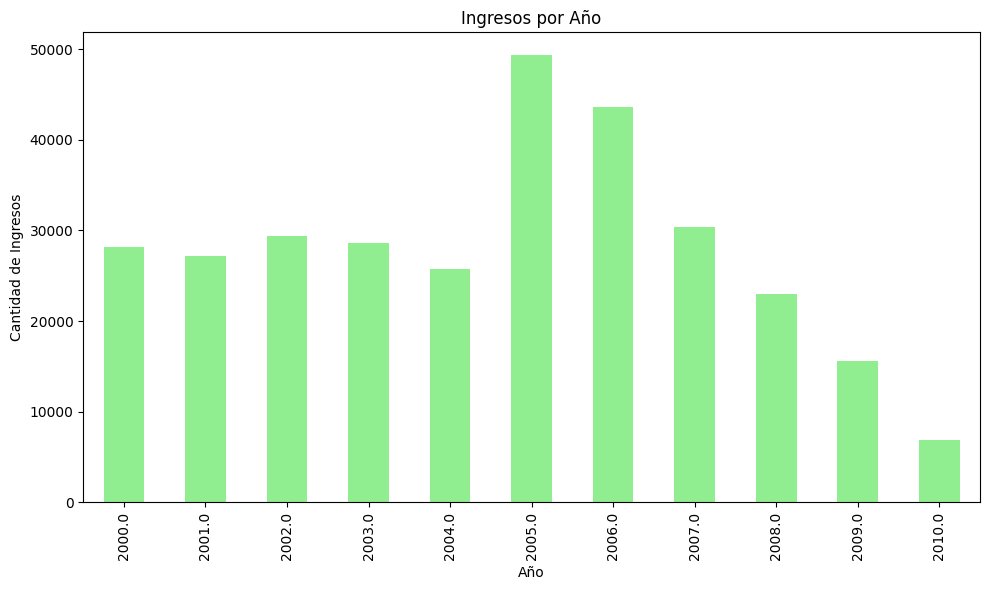

In [ ]:
# Calcular la cantidad de ingresos por año
ingresos_por_anio = df_fusion_extendido['anio_ingreso'].value_counts()

# Encontrar el año con mayor ingreso
anio_mayor_ingreso = ingresos_por_anio.idxmax()
cantidad_mayor_ingreso = ingresos_por_anio.max()

print(f"Año con mayor ingreso: {anio_mayor_ingreso} con {cantidad_mayor_ingreso} ingresos")

# Crear una gráfica de barras para los ingresos por año
ingresos_por_anio.sort_index().plot(kind='bar', figsize=(10, 6), color='lightgreen')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Ingresos')
plt.title('Ingresos por Año')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# ingreso por anio por carrera

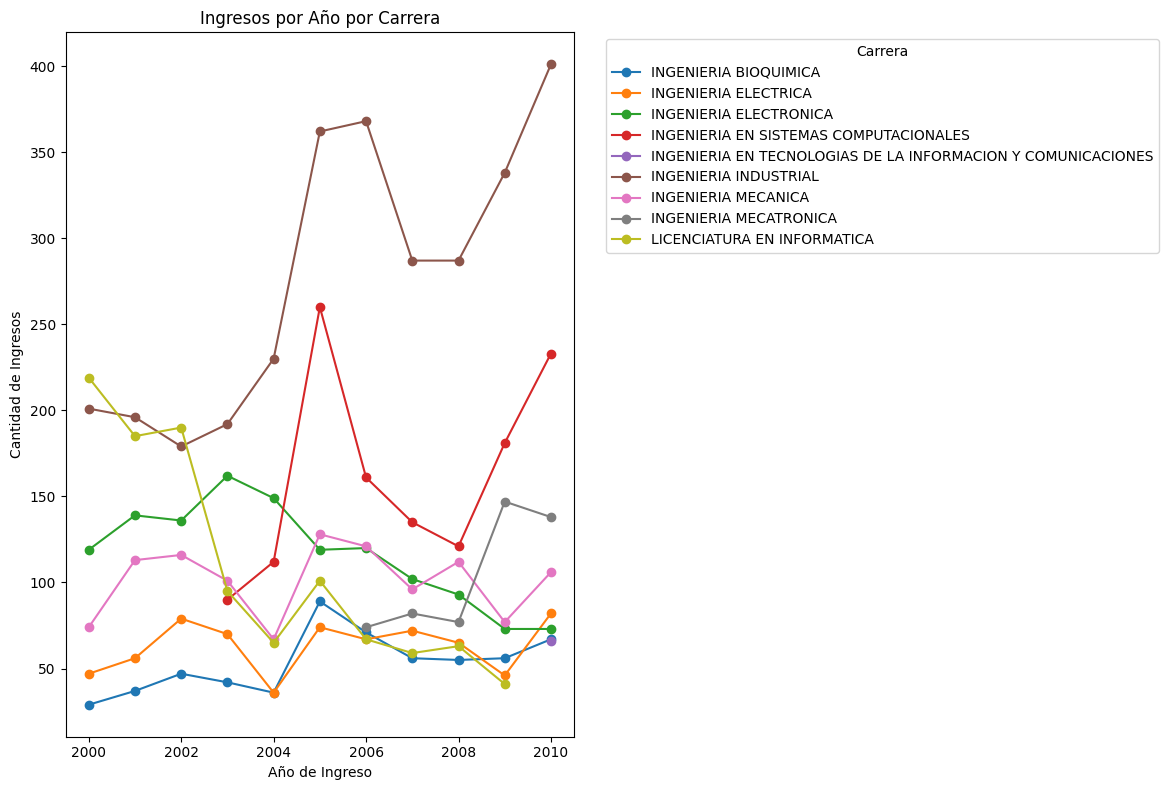

In [ ]:
# Crear una gráfica de líneas para los ingresos por año por carrera
ingresos_por_anio_por_carrera.plot(kind='line', figsize=(12, 8), marker='o')

# Configurar etiquetas y título
plt.xlabel('Año de Ingreso')
plt.ylabel('Cantidad de Ingresos')
plt.title('Ingresos por Año por Carrera')
plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# poblacion anual por cohorte

anio_ingreso
2000.0     689
2001.0     726
2002.0     747
2003.0     752
2004.0     695
2005.0    1133
2006.0    1049
2007.0     889
2008.0     873
2009.0     959
2010.0    1166
Name: clave_alumno, dtype: int64


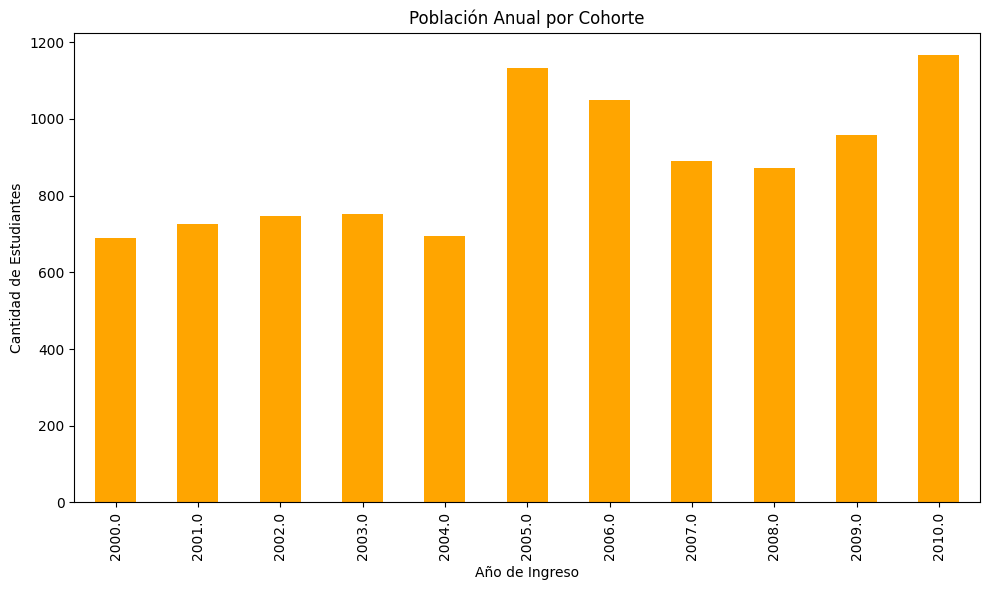

In [ ]:
# Calcular la población anual por cohorte
poblacion_anual_por_cohorte = df_fusion_extendido.groupby('anio_ingreso')['clave_alumno'].nunique()

# Mostrar los resultados
print(poblacion_anual_por_cohorte)

# Crear una gráfica de barras para la población anual por cohorte
poblacion_anual_por_cohorte.sort_index().plot(kind='bar', figsize=(10, 6), color='orange')

# Configurar etiquetas y título
plt.xlabel('Año de Ingreso')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Población Anual por Cohorte')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# poblacion por sexo por carrera

sexo                                                   1     2
nombre                                                        
INGENIERIA BIOQUIMICA                                246   339
INGENIERIA ELECTRICA                                 682    12
INGENIERIA ELECTRONICA                              1222    63
INGENIERIA EN SISTEMAS COMPUTACIONALES              1022   271
INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y C...    46    20
INGENIERIA INDUSTRIAL                               1926  1116
INGENIERIA MECANICA                                 1072    39
INGENIERIA MECATRONICA                               474    44
LICENCIATURA EN INFORMATICA                          676   409


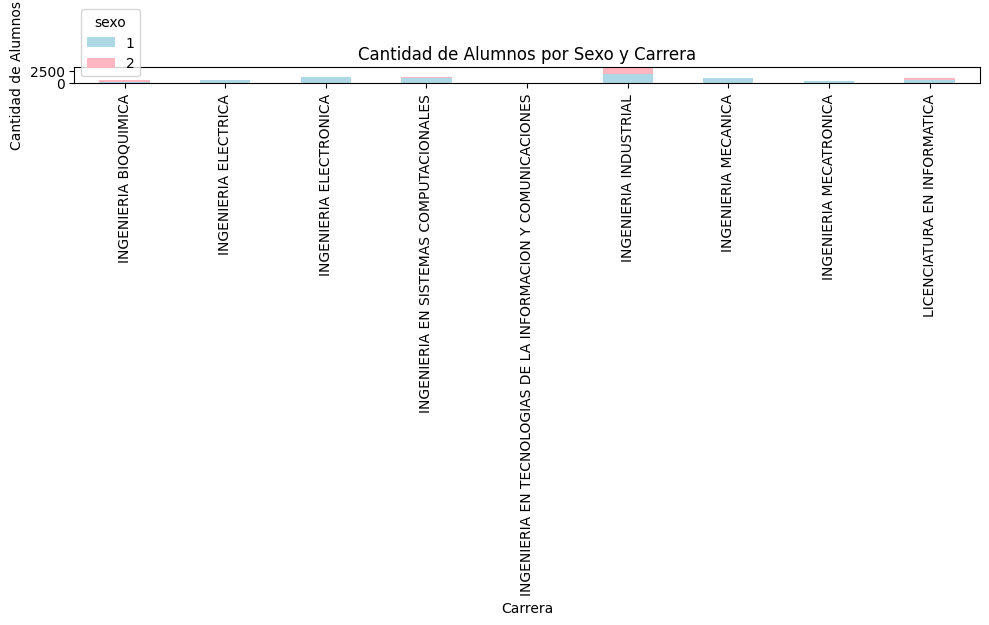

In [ ]:
#poblacion por sexo por carrera
# Calcular la cantidad de alumnos por sexo y carrera
cantidad_alumnos_por_sexo_y_carrera = df_fusion.groupby(['nombre', 'sexo'])['clave_alumno'].nunique().unstack()
print(cantidad_alumnos_por_sexo_y_carrera)
# Crear una gráfica de barras apiladas
cantidad_alumnos_por_sexo_y_carrera.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightpink'])
# Configurar etiquetas y título
plt.xlabel('Carrera')
plt.ylabel('Cantidad de Alumnos')
plt.title('Cantidad de Alumnos por Sexo y Carrera')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

# promedio por sexo por carrera

sexo                                                        1          2
nombre                                                                  
INGENIERIA BIOQUIMICA                               72.554413  78.317549
INGENIERIA ELECTRICA                                70.784951  80.571429
INGENIERIA ELECTRONICA                              71.234074  78.465948
INGENIERIA EN SISTEMAS COMPUTACIONALES              68.020475  76.075402
INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y C...  60.914634  62.522523
INGENIERIA INDUSTRIAL                               77.772960  86.090869
INGENIERIA MECANICA                                 70.733663  78.313904
INGENIERIA MECATRONICA                              77.629896  83.740650
LICENCIATURA EN INFORMATICA                         70.143764  78.181939


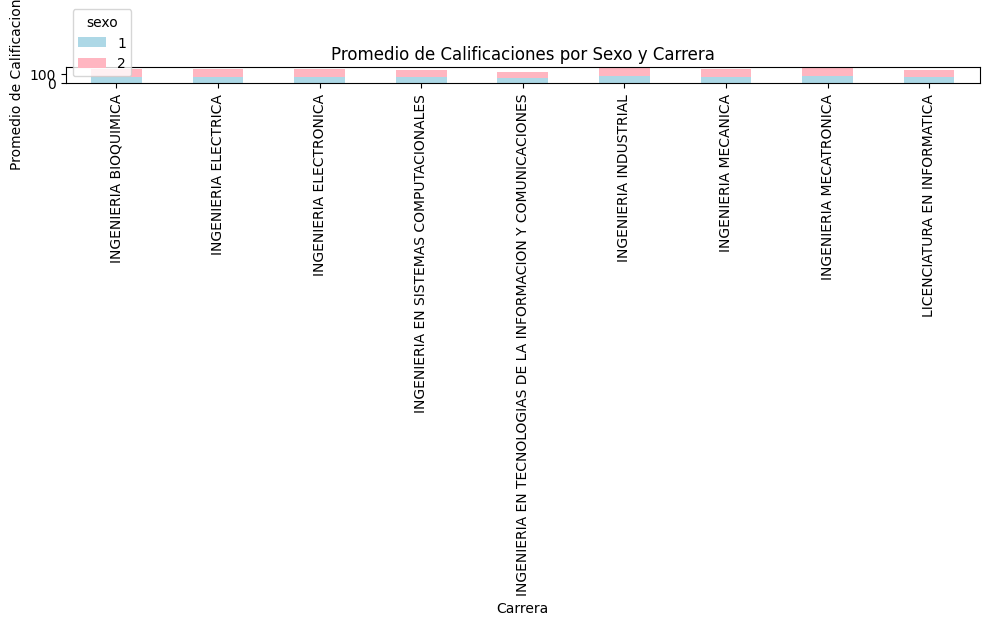

In [ ]:
#promedio por sexo por carrera
# Calcular el promedio de calificaciones por sexo y carrera
promedio_calificaciones_por_sexo_y_carrera = df_fusion.groupby(['nombre', 'sexo'])['calificacion'].mean().unstack()
print(promedio_calificaciones_por_sexo_y_carrera)
# Crear una gráfica de barras apiladas
promedio_calificaciones_por_sexo_y_carrera.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightpink'])
# Configurar etiquetas y título
plt.xlabel('Carrera')
plt.ylabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones por Sexo y Carrera')
# Mostrar la gráfica
plt.tight_layout()
plt.show()

# promedios por carrera por anio

nombre        INGENIERIA BIOQUIMICA  INGENIERIA ELECTRICA  \
anio_ingreso                                                
2000.0                    72.097938             64.413677   
2001.0                    69.665560             69.903727   
2002.0                    76.275726             67.462366   
2003.0                    70.705754             64.792161   
2004.0                    85.688976             76.797641   
2005.0                    74.496267             74.593657   
2006.0                    73.331217             72.292058   
2007.0                    79.080611             72.031225   
2008.0                    81.262355             74.655172   
2009.0                    77.427594             74.436620   
2010.0                    86.102757             76.066806   

nombre        INGENIERIA ELECTRONICA  INGENIERIA EN SISTEMAS COMPUTACIONALES  \
anio_ingreso                                                                   
2000.0                     69.586565          

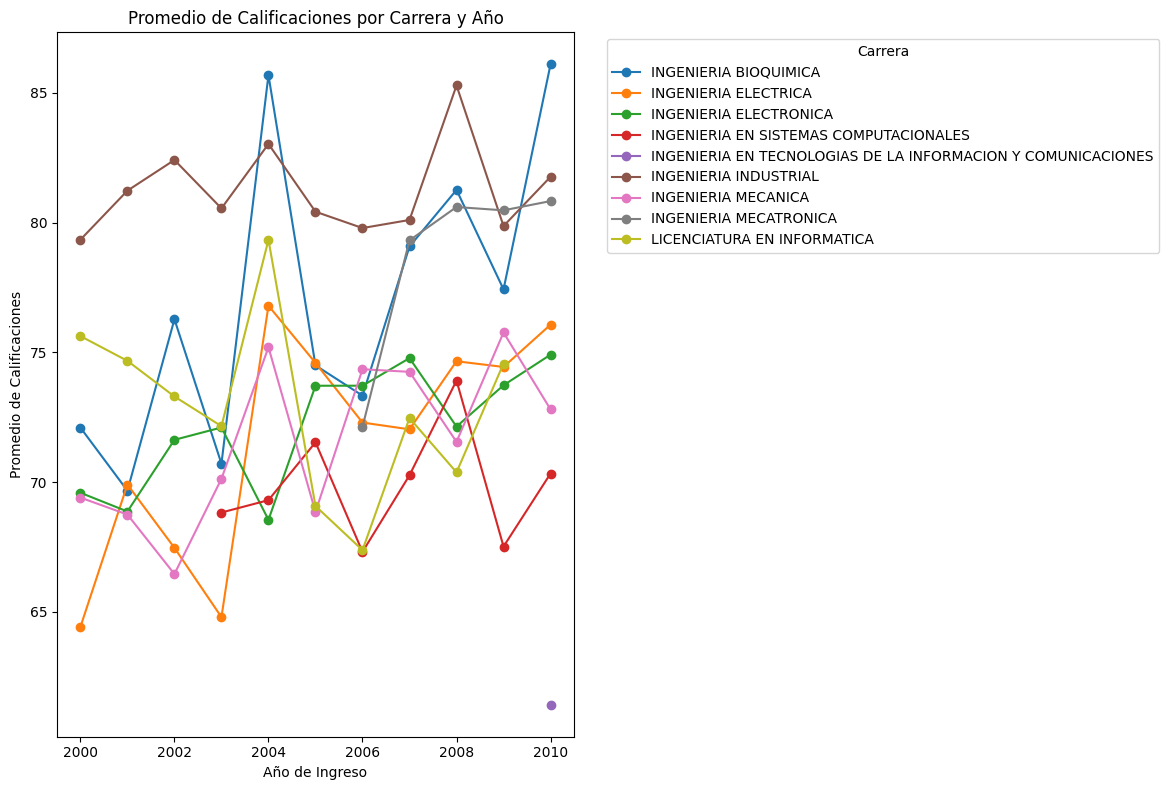

In [ ]:
# Calcular el promedio de calificaciones por carrera y año
promedio_por_carrera_por_anio = df_fusion_extendido.groupby(['anio_ingreso', 'nombre'])['calificacion'].mean().unstack()

# Mostrar los resultados
print(promedio_por_carrera_por_anio)

# Crear una gráfica de líneas para los promedios por carrera por año
promedio_por_carrera_por_anio.plot(kind='line', figsize=(12, 8), marker='o')

# Configurar etiquetas y título
plt.xlabel('Año de Ingreso')
plt.ylabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones por Carrera y Año')
plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()